In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [2]:
# Load dataset
task2_file_path = "DA -Task 2..xlsx"
task2_df = pd.read_excel(task2_file_path, sheet_name="Sheet1")

In [3]:
# Data Cleaning
task2_df["CAUSAL_PART_NM"].fillna("Unknown", inplace=True)
task2_df["PLANT"].fillna("Not Available", inplace=True)
categorical_columns = ["PLATFORM", "BODY_STYLE", "VPPC", "PLANT", "BUILD_COUNTRY"]
task2_df[categorical_columns] = task2_df[categorical_columns].apply(lambda x: x.str.strip().str.upper())

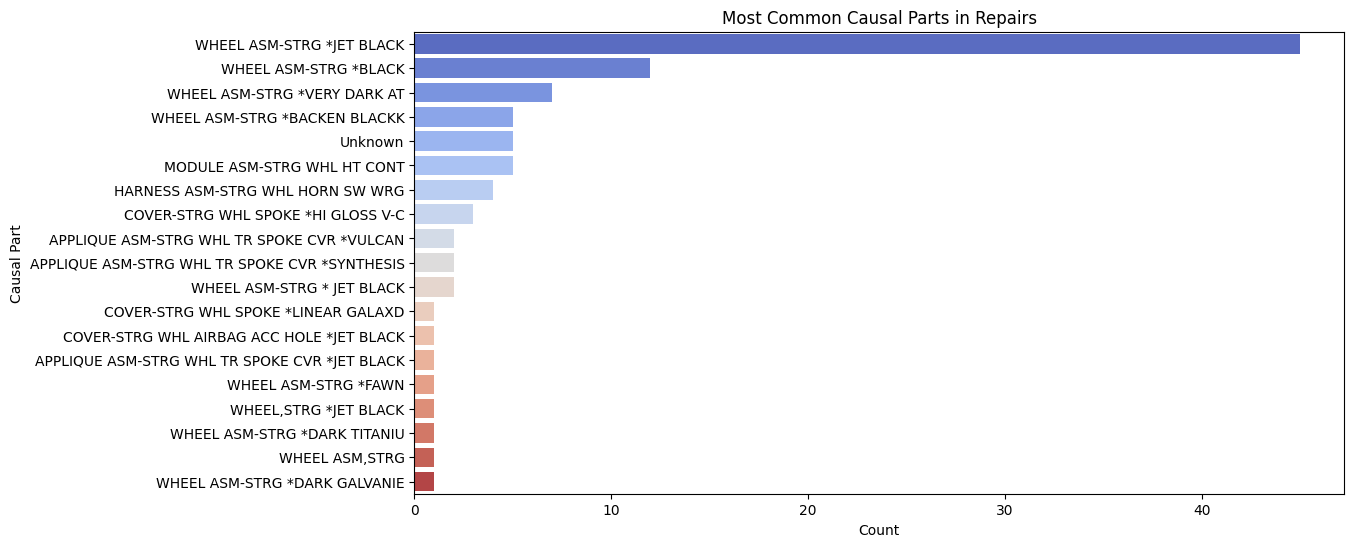

In [4]:
# Visualizations
plt.figure(figsize=(12, 6))
sns.countplot(y=task2_df["CAUSAL_PART_NM"], order=task2_df["CAUSAL_PART_NM"].value_counts().index, palette="coolwarm")
plt.title("Most Common Causal Parts in Repairs")
plt.xlabel("Count")
plt.ylabel("Causal Part")
plt.show()

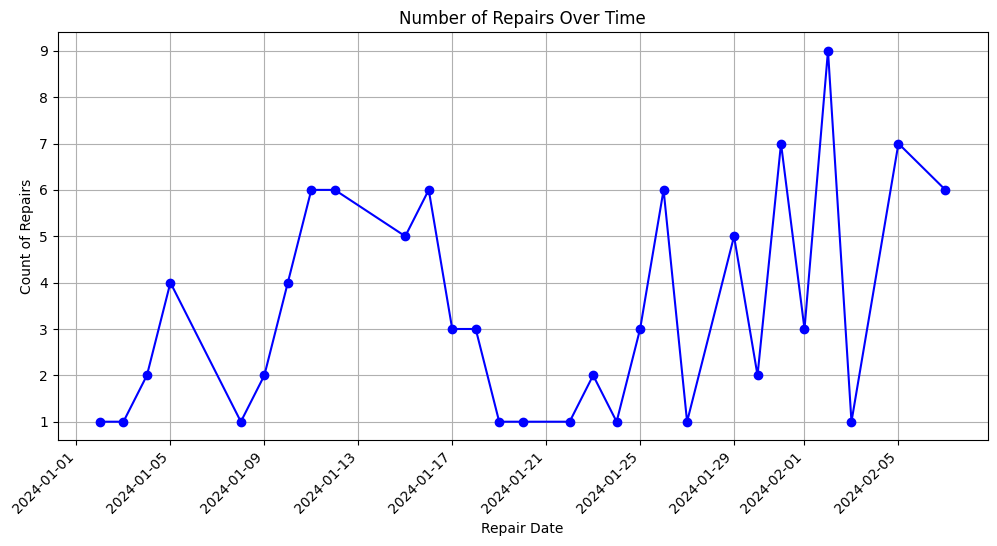

In [5]:
plt.figure(figsize=(12, 6))
task2_df["REPAIR_DATE"].value_counts().sort_index().plot(kind="line", marker="o", color="b")
plt.title("Number of Repairs Over Time")
plt.xlabel("Repair Date")
plt.ylabel("Count of Repairs")
plt.xticks(rotation=45)
plt.grid()
plt.show()

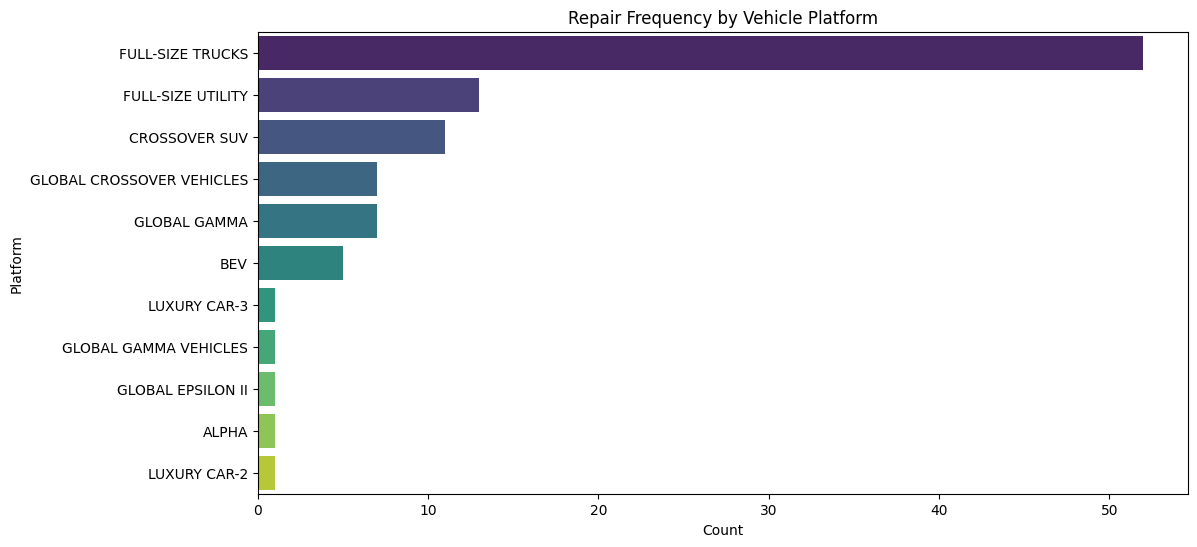

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(y=task2_df["PLATFORM"], order=task2_df["PLATFORM"].value_counts().index, palette="viridis")
plt.title("Repair Frequency by Vehicle Platform")
plt.xlabel("Count")
plt.ylabel("Platform")
plt.show()

In [7]:
# Keyword Extraction
def extract_top_keywords(text_series, num_keywords=10):
    words = " ".join(text_series.dropna()).lower()
    words = re.findall(r"\b[a-zA-Z-]+\b", words)
    word_counts = Counter(words)
    return word_counts.most_common(num_keywords)

top_complaint_keywords = extract_top_keywords(task2_df["CUSTOMER_VERBATIM"], 10)
top_correction_keywords = extract_top_keywords(task2_df["CORRECTION_VERBATIM"], 10)

print("Top Complaint Keywords:", top_complaint_keywords)
print("Top Repair Action Keywords:", top_correction_keywords)

Top Complaint Keywords: [('steering', 100), ('wheel', 100), ('states', 58), ('customer', 56), ('the', 55), ('is', 52), ('on', 44), ('and', 36), ('coming', 25), ('not', 21)]
Top Repair Action Keywords: [('wheel', 127), ('steering', 124), ('and', 80), ('replaced', 51), ('to', 34), ('the', 26), ('found', 24), ('replace', 24), ('removed', 17), ('module', 16)]


In [8]:
# Save cleaned data
task2_df.to_excel("Cleaned_DA_Task_2.xlsx", index=False)